📌 Selected Sensors for LSTM: ['Sensor2', 'Sensor3', 'Sensor4', 'Sensor6', 'Sensor7', 'Sensor8', 'Sensor9', 'Sensor11', 'Sensor12', 'Sensor13', 'Sensor15', 'Sensor17', 'Sensor20', 'Sensor21']


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 54s 418ms/step - loss: 89.0839 - val_loss: 102.2849 - learning_rate: 1.0000e-04
Epoch 2/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 81s 410ms/step - loss: 85.0939 - val_loss: 95.8558 - learning_rate: 1.0000e-04
Epoch 3/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 82s 411ms/step - loss: 79.1594 - val_loss: 84.6375 - learning_rate: 1.0000e-04
Epoch 4/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 83s 415ms/step - loss: 68.5461 - val_loss: 75.4971 - learning_rate: 1.0000e-04
Epoch 5/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 81s 409ms/step - loss: 56.2140 - val_loss: 57.9063 - learning_rate: 1.0000e-04
Epoch 6/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 80s 391ms/step - loss: 41.7558 - val_loss: 43.0442 - learning_rate: 1.0000e-04
Epoch 7/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 84s 412ms/step - loss: 30.1508 - val_loss: 34.3022 - learning_rate: 1.0000e-04
Epoch 8/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 45s 410ms/step - loss: 26.4345 - val_loss: 34.8530 - learning_rate: 1.0000e-04
Epoch 9/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 80s 395

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━

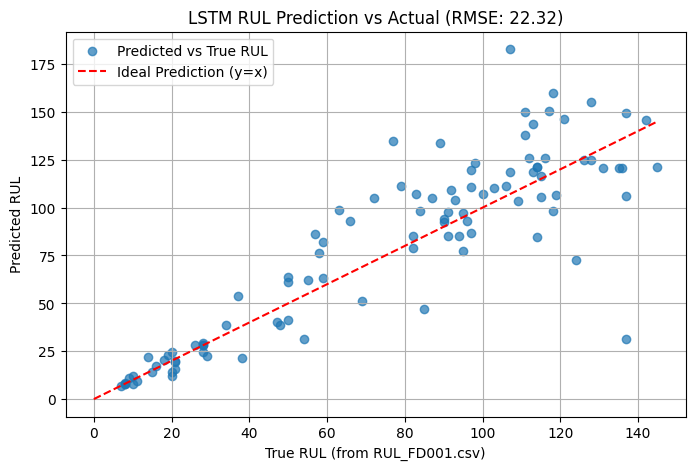

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import Huber
from tensorflow.keras.callbacks import ReduceLROnPlateau

# 🔹 Load datasets
train_file ="/content/processed_train_FD001 - Copy.csv"
test_file = "/content/cleaned_test_FD001 - Copy.csv"
rul_file = "/content/RUL_FD001 - Copy.csv"

train_df = pd.read_csv(train_file)
test_df = pd.read_csv(test_file)
true_rul_df = pd.read_csv(rul_file, header=None, names=["Initial_RUL"])

# 🔹 Select all sensor columns
sensor_cols = [f"Sensor{i}" for i in range(1, 22)]
train_df = train_df[["Unit", "Time"] + sensor_cols]
test_df = test_df[["Unit", "Time"] + sensor_cols]

# 🔹 Apply Savitzky-Golay filter for noise reduction
for sensor in sensor_cols:
    train_df[sensor] = savgol_filter(train_df[sensor], window_length=15, polyorder=2, mode='nearest')
    test_df[sensor] = savgol_filter(test_df[sensor], window_length=15, polyorder=2, mode='nearest')

# 🔹 Compute RUL for training data
max_cycles = train_df.groupby("Unit")["Time"].max()
train_df = train_df.merge(max_cycles, on="Unit", suffixes=("", "_max"))
train_df["RUL"] = train_df["Time_max"] - train_df["Time"]
train_df.drop(columns=["Time_max"], inplace=True)

# 🔹 Feature Engineering: Differencing & Rolling Means
for sensor in sensor_cols:
    train_df[f"{sensor}_diff"] = train_df.groupby("Unit")[sensor].diff().fillna(0)
    test_df[f"{sensor}_diff"] = test_df.groupby("Unit")[sensor].diff().fillna(0)

    train_df[f"{sensor}_rolling"] = train_df.groupby("Unit")[sensor].rolling(window=5).mean().reset_index(level=0, drop=True)
    test_df[f"{sensor}_rolling"] = test_df.groupby("Unit")[sensor].rolling(window=5).mean().reset_index(level=0, drop=True)

# 🔹 Normalize Sensor Data
scaler = MinMaxScaler()
train_df[sensor_cols] = scaler.fit_transform(train_df[sensor_cols])
test_df[sensor_cols] = scaler.transform(test_df[sensor_cols])

# 🔹 Feature Selection using L1 Regularization (Lasso)
X_train_lasso = train_df[sensor_cols].values
y_train_lasso = train_df["RUL"].values

lasso = Lasso(alpha=0.001)
lasso.fit(X_train_lasso, y_train_lasso)
selected_sensors = [sensor for sensor, coef in zip(sensor_cols, lasso.coef_) if abs(coef) > 0]
print(f"📌 Selected Sensors for LSTM: {selected_sensors}")

# 🔹 LSTM Sequence Length
SEQ_LENGTH = 30

# 🔹 Prepare training sequences
def create_sequences(df, seq_length=30, is_train=True):
    X, y = [], []
    for unit in df["Unit"].unique():
        unit_data = df[df["Unit"] == unit][selected_sensors].values
        rul_values = df[df["Unit"] == unit]["RUL"].values if is_train else None
        for i in range(len(unit_data) - seq_length):
            X.append(unit_data[i : i + seq_length])
            if is_train:
                y.append(rul_values[i + seq_length])
    return np.array(X), np.array(y) if is_train else None

X_train, y_train = create_sequences(train_df, SEQ_LENGTH, is_train=True)
X_test, _ = create_sequences(test_df, SEQ_LENGTH, is_train=False)

# Reshape for LSTM
X_train = X_train.reshape(-1, SEQ_LENGTH, len(selected_sensors))
X_test = X_test.reshape(-1, SEQ_LENGTH, len(selected_sensors))

# 🔹 Define Improved LSTM Model
model = Sequential([
    LSTM(256, activation='tanh', return_sequences=True, input_shape=(SEQ_LENGTH, len(selected_sensors))),
    Dropout(0.3),
    LSTM(128, activation='tanh', return_sequences=True),
    Dropout(0.3),
    LSTM(64, activation='tanh'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output RUL prediction
])

# 🔹 Compile Model with Huber Loss
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss=Huber(delta=1.0))

# 🔹 Learning Rate Scheduler
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# 🔹 Train Model
model.fit(X_train, y_train, epochs=50, batch_size=128, validation_split=0.2, callbacks=[reduce_lr])

# 🔹 Save trained model
model.save("/mnt/data/optimized_lstm_fd001_v2.h5")

# 🔹 Predict RUL at last time step of each unit
def predict_rul(model, test_df, seq_length):
    final_rul_predictions = []
    for unit in test_df["Unit"].unique():
        unit_data = test_df[test_df["Unit"] == unit].reset_index(drop=True)
        last_sequence = unit_data[selected_sensors].values[-seq_length:] if len(unit_data) >= seq_length else np.pad(
            unit_data[selected_sensors].values, ((seq_length - len(unit_data), 0), (0, 0)), 'edge'
        )
        last_sequence = last_sequence.reshape(1, seq_length, len(selected_sensors))
        predicted_rul = model.predict(last_sequence)[0][0]
        final_rul_predictions.append(predicted_rul)
    return np.array(final_rul_predictions)

predicted_rul = predict_rul(model, test_df, SEQ_LENGTH)
true_rul_last = true_rul_df["Initial_RUL"].values

# 🔹 Save results
predictions_df = pd.DataFrame({"Unit": test_df["Unit"].unique(), "Predicted_RUL": predicted_rul, "True_RUL": true_rul_last})
predictions_df.to_csv("/mnt/data/predicted_rul_optimized_v2.csv", index=False)

# 🔹 Compute and Display RMSE
rmse = np.sqrt(mean_squared_error(true_rul_last, predicted_rul))
print(f"✅ RMSE: {rmse:.2f}")

# 🔹 Plot Predicted vs True RUL
plt.figure(figsize=(8, 5))
plt.scatter(true_rul_last, predicted_rul, label="Predicted vs True RUL", alpha=0.7)
plt.xlabel("True RUL (from RUL_FD001.csv)")
plt.ylabel("Predicted RUL")
plt.plot([0, max(true_rul_last)], [0, max(true_rul_last)], 'r--', label="Ideal Prediction (y=x)")
plt.legend()
plt.title(f"LSTM RUL Prediction vs Actual (RMSE: {rmse:.2f})")
plt.grid()
plt.show()